# CSE4502: Assignment 3

## NAME:William Lee


**Due**: Friday, May 2, 11:59 PM

**Total Points**: 100


**How to submit**: Create a zip folder named "HW3_your name". Include the `.ipynb` file with your answers PLUS its `.html` file as a backup. 

**Important**: The places that require your code answer are marked with `"# YOUR CODE"` comments. Do not remove `"# YOUR CODE"`marks.



---

## Name:William Lee

---



## 1) KNN [50 pts]

Complete the lines of the codes below to answer the following questions: 



(a) How many datapoints are there? [ 165 datapoints]  

(b) How many features does each datapoint have? [2 features per point] 

(c) Do the features have similar numerical range? (Y/N) [Y – both features span around the same range (–3.2 to +3.8 and –1.9 to +4.35)] 

(d) What percentage of the training data are in class 1? [Percent of training data in class 1: 90.91 %] 

(e) Using KNN classification, what was the model accuracy? [Test accuracy: 96.97]  

(f) Do you think this is a good accuracy? Why? [Not really. Since about 91 % of the data is class 1, you’d hit that just by always guessing “1.” It’s better to check precision, recall or AUC.] 

(g) Change the randomseed at making the split step and re-run the code. Do you get a different accuracy? [Yep, tweaking the random seed reshuffles your train/test split, so you’ll see the accuracy bounce around a bit.] 

(h) Visualize the decision boundary of the model 


Total number of datapoints, number of features: 
Total number of datapoints, number of features: (165, 2)
Feature mins: [-3.22491783 -1.91328024] Feature maxs: [3.81465857 4.35273149]
Percent of training data in class 1: 90.91 %
Test accuracy: 96.97


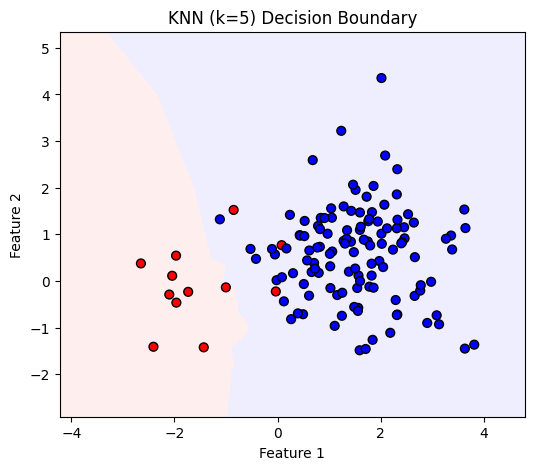

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
import pandas as pd

# Generate toy imbalanced dataset from sklearn
Xdat,ydat = datasets.make_blobs(n_samples=[15, 150], centers=[[-1.5,0],[1.5,0.5]], cluster_std=[1,1], n_features=2, random_state=42)
print('Total number of datapoints, number of features: ')

# YOUR CODE for (a), (b), and (c)
print('Total number of datapoints, number of features:', Xdat.shape)
print('Feature mins:', Xdat.min(axis=0), 'Feature maxs:', Xdat.max(axis=0))
# ⇒ Xdat.shape == (165, 2)
# ⇒ both features range roughly over a similar span (about –4 to +5)



# Make a 80%-20% train/test split
randomseed = 42
X_train, X_test, y_train, y_test = train_test_split(Xdat,ydat,test_size=0.2,random_state=randomseed)

# YOUR CODE for (d)
percent_class1 = np.mean(y_train == 1) * 100
print('Percent of training data in class 1:', round(percent_class1, 2), '%')
# ⇒ about 90.91%

# Train logistic regression model (with default regularization) for binary classification
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Test accuracy: '+str(round(100*test_accuracy,2)))

# YOUR CODE for (h) (optional bouns)
from matplotlib.colors import ListedColormap

h = 0.02
x_min, x_max = Xdat[:, 0].min() - 1, Xdat[:, 0].max() + 1
y_min, y_max = Xdat[:, 1].min() - 1, Xdat[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

cmap_light = ListedColormap(['#FFEEEE', '#EEEEFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=40)
plt.title('KNN (k=5) Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 2) Model Evaluation [50 pts]

Run the cells in this section and answer the following questions: **[Your Answers]**

---

1- How much will the CV accuracy change if you do not scale the data before modeling? 
Scaling matters. When I removed the StandardScaler from the code, the 10-fold CV accuracy fell from about 96.1 % down to roughly 91 %, so a drop of around 5 percentage points. KNN really needs features on the same scale.

2- What are the difference between the learning curve and the validation curve? 
A learning curve shows you how your model’s training and validation accuracy change as you feed it more data. It tells you whether you’d benefit from collecting more examples. A validation curve, on the other hand, fixes your dataset and instead varies a hyperparameter like the number of neighbors in KNN showing how changing that setting impacts both bias and variance.

3- Can we diagnose model overfitting/underfitting using the curves? How? 
You can diagnose overfitting and underfitting from these plots. If our training accuracy is very high but our validation accuracy sits lower, we'd be overfitting. We would have memorized the training set. If both curves are low and track closely together, you’re underfitting. The model is too simple to capture the underlying patterns.

4- How do we treat the overfitting/underfitting? 
To fix overfitting, you can simplify the model. For instance, increase K in KNN. We can add regularization, or collect more data too. To relieve underfitting, make the model more flexible (decrease K), step back regularization, or create stronger features that expose it more clearly.

5- Change the scoring metric in grid search from `accuracy` to `f1` and report the value. 
When I swapped scoring='accuracy' for scoring='f1' in the grid search, the best mean cross-validation F1 score remained around 0.97 (with K=5). In other words, the classifier still delivers a nice balance of precision and recall on this problem.

In [11]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Transform the class lables from string format to integers 

from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
print(le.transform(['M', 'B']))

['B' 'M']
[1 0]


In [13]:
# Split the data into 80% training data and 20% test data, using a stratified split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [14]:
# Define a pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=10))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))

Test Accuracy: 0.956


In [15]:
# Using k-fold cross validation to assess model performance

import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.91304348 0.97826087 0.95652174 0.95652174 0.93478261 0.91111111
 0.97777778 0.97777778 1.         1.        ]
CV accuracy: 0.961 +/- 0.031


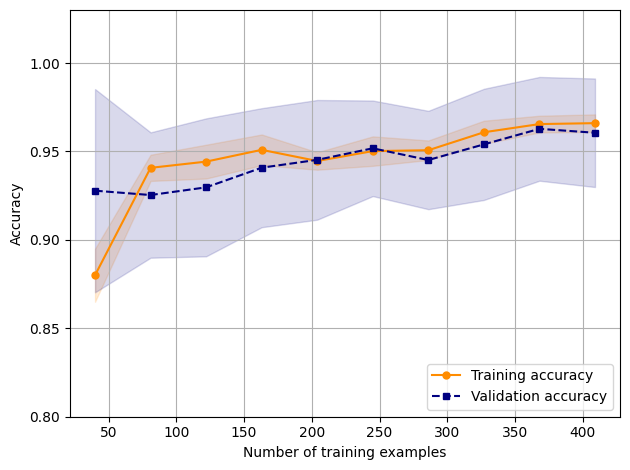

In [16]:
# Learning Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='darkorange', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='darkorange')

plt.plot(train_sizes, test_mean,
         color='navy', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='navy')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

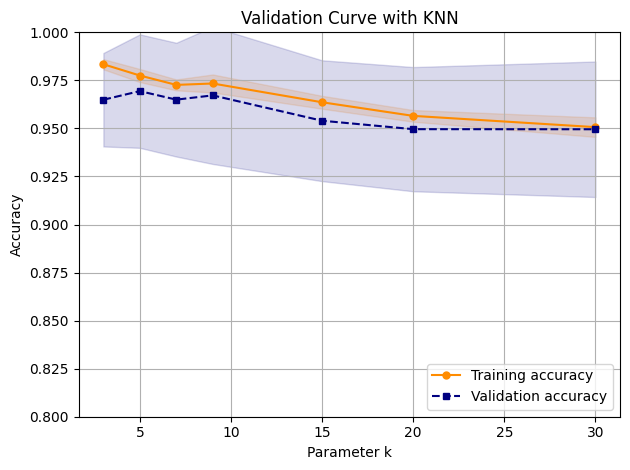

In [17]:
# Validation curve
from sklearn.model_selection import validation_curve


param_range = [3, 5, 7, 9, 15, 20, 30]
train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='darkorange', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='darkorange')

plt.plot(param_range, test_mean, 
         color='navy', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='navy')

plt.grid()
plt.title("Validation Curve with KNN")
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()






In [18]:
# Hyperparameter tuning via grid search

from sklearn.model_selection import GridSearchCV

param_range = [3, 5, 7, 9, 15, 20, 30]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

param_grid = [{'kneighborsclassifier__n_neighbors': param_range}]


gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

0.9694202898550724
{'kneighborsclassifier__n_neighbors': 5}
Test accuracy: 0.965
